In [419]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split. Crossval score. Gridsearch CV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Import metrics
from sklearn import metrics

# Import Pipeline
from sklearn.pipeline import Pipeline

# Import models

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier


# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.datasets import make_classification

In [420]:
# Read in the modeling data
df = pd.read_csv('./data/text_count_sentiment.csv')

### Model 1 - Count Vectorizer and Naive Bayes with no word count or sentiment data

In [421]:
# Step 1: Split into training & testing sets
X = df['features']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=13)

In [254]:
# Get the baseline model performance
y_test.value_counts(normalize = True)

1    0.501002
0    0.498998
Name: target, dtype: float64

In [255]:
X_train.shape

(1494,)

In [256]:
# Create pipe with count vectorizer and multinomial NB

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])



In [257]:
# Set the pipe parameters

pipe_params = {
    'cvec__max_features':[2000, 3000, 4000, 5000],
    'cvec__min_df' : [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1, 1), (1, 2)]
}

In [258]:
# Instantiate GridSearchCV.

gs_cv = GridSearchCV(pipe, # what object are we optimizing?
                  pipe_params, # what parameters values are we searching?
                  cv = 5) # 5-fold cross-validation.

In [260]:
# Fit GridSearch to training data.
gs_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [261]:
# Get the best CV score
gs_cv.best_score_

0.7483176584139525

In [262]:
# Get the best parameters for the model
gs_cv.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 2000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1)}

In [271]:
# Score model on training set.
print(f'Train accuracy = {gs_cv.score(X_train, y_train)}')
# Score model on testing set.
print(f'Test accuracy = {gs_cv.score(X_test, y_test)}')
# Get predictions
preds = gs_cv.predict(X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
# Calculate the specificity
print(f'Specificity = {tn / (tn + fp)}')
# Calculate the recall
print(f'Recall = {tp / (tp + fn)}')

Train accuracy = 0.8380187416331994
Test accuracy = 0.7555110220440882
Specificity = 0.7228915662650602
Recall = 0.788


### Model 2 - TFIDF and Naive Bayes with no word count or sentiment data

In [272]:
# Instantiate the transformer.
tvec = TfidfVectorizer()

In [273]:
# Step 1: Split into training & testing sets
X = df['features']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=13)

In [275]:
# Set a pipe for TFIDF and MultinomialNB
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [276]:
# Set the TFIDF parameters
pipe_tvec_params = {
    'tvec__max_features': [2000, 3000, 4000, 5000],
    'tvec__stop_words': [None, 'english'],
    'tvec__min_df' : [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [277]:
# Instantiate GridSearchCV.
gs_tvec = GridSearchCV(pipe_tvec,
                       pipe_tvec_params,
                       cv = 5,
                       verbose = 1)

In [278]:
# Fit GridSearch to training data.
gs_tvec.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   53.3s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']},
             verbose=1)

In [280]:
# Get the best CV score
gs_tvec.best_score_

0.7483356153621692

In [279]:
# Get the best parameters
gs_tvec.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 3000,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

In [286]:
# Score model on training set.
print(f'Train accuracy = {gs_tvec.score(X_train, y_train)}')
# Score model on testing set.
print(f'Test accuracy = {gs_tvec.score(X_test, y_test)}')
# Get predictions
preds = gs_tvec.predict(X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
# Calculate the specificity
print(f'Specificity = {tn / (tn + fp)}')
# Calculate the recall
print(f'Recall = {tp / (tp + fn)}')

Train accuracy = 0.8594377510040161
Test accuracy = 0.7314629258517034
Specificity = 0.6414342629482072
Recall = 0.8225806451612904


### Model - Building a TFIDF dataframe to combine with sentiment and word count

In [451]:
# Note that much of this section of code comes from Heather's review 10/19
X = df[['features', 'feature_length', 'feature_word_count', 'compound', 'neg', 'neu', 'pos']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, stratify = y)

In [452]:
X.shape

(1909, 7)

In [456]:
# Instantiate and set params for TFIDF
tf = TfidfVectorizer(max_features = 3000, ngram_range = (1,2), stop_words = 'english', max_df = 0.9, min_df = 3)

In [457]:
# Fit transform train and tranform test data
X_train_tf = tf.fit_transform(X_train['features'])
X_test_tf = tf.transform(X_test['features'])

In [458]:
# Create a new data frame for training and test set
df_X_train = pd.DataFrame(X_train_tf.todense(), columns=tf.get_feature_names())
df_X_test = pd.DataFrame(X_test_tf.todense(), columns = tf.get_feature_names())

In [460]:
# Reset indicies for all dataframes
df_X_train.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
df_X_test.reset_index(drop=True, inplace = True)
X_test.reset_index(drop=True, inplace=True)

In [464]:
# Add sentiment scores back to data and create combined datafremes for train and test
combined_X_train = pd.concat([df_X_train, X_train], axis =1)
combined_X_train.head(1)

,10,10 years,100,12,15,17,1977,1999,20,20 years,...,yuuzhan vong,zahn,zero,features,feature_length,feature_word_count,compound,neg,neu,pos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,i had a little extra time this weekend so i ma...,281,50,-0.5574,0.077,0.923,0.0


In [465]:
combined_X_test = pd.concat([df_X_test, X_test], axis = 1)

In [466]:
# Drop the original features column
combined_X_train.drop(columns = 'features', inplace=True)
combined_X_test.drop(columns = 'features', inplace = True)

In [468]:
combined_X_train.shape, combined_X_test.shape

((1431, 3006), (478, 3006))

In [469]:
y_train.shape, y_test.shape

((1431,), (478,))

### Model #3 Decision Tree Classifier with TFIDF and sentiment/word count data

In [308]:
# Instantiate and fit Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(combined_X_train, y_train)

DecisionTreeClassifier()

In [309]:
# Accuracy scores without grid search
dt.score(combined_X_train, y_train), dt.score(combined_X_test, y_test)

(0.9973226238286479, 0.6492985971943888)

In [310]:
# Set parameters
params = [{'max_depth': [15, 17, 20],   #The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves     
            'max_features': [.65, .5, .35], #The number of features to consider when looking for the best split
           'class_weight': [None, 'balanced'],
          'min_samples_split' : [4, 5, 6]}]  #The minimum number of samples required to split an internal node (default is 2)

In [311]:
# Instatiate the grid
gs_dt = GridSearchCV(dt, param_grid = params, cv = 3)

In [312]:
# Fit the decision tree on the training data
gs_dt.fit(combined_X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'class_weight': [None, 'balanced'],
                          'max_depth': [15, 17, 20],
                          'max_features': [0.65, 0.5, 0.35],
                          'min_samples_split': [4, 5, 6]}])

In [315]:
# Get the best parameters
gs_dt.best_params_

{'class_weight': 'balanced',
 'max_depth': 20,
 'max_features': 0.5,
 'min_samples_split': 5}

In [317]:
# Score model on training set.
print(f'Train accuracy = {gs_dt.score(combined_X_train, y_train)}')
# Score model on testing set.
print(f'Test accuracy = {gs_dt.score(combined_X_test, y_test)}')
# Get predictions
preds = gs_dt.predict(combined_X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
# Calculate the specificity
print(f'Specificity = {tn / (tn + fp)}')
# Calculate the recall
print(f'Recall = {tp / (tp + fn)}')

Train accuracy = 0.9089692101740294
Test accuracy = 0.6913827655310621
Specificity = 0.7630522088353414
Recall = 0.62


### Models #4 and #5 with Random Forest, Extra Trees, TFIDF and sentiment/word count data

In [320]:
# Run Random Forrest CV - all steps combined
rf = RandomForestClassifier(random_state=42) #Instatiate and set params
params = {
    'n_estimators': [75, 100, 125], 
    'max_depth': [None, 3, 4],
    'max_features': ['auto', None]
}
gs_rf = GridSearchCV(rf, param_grid=params) # Instantiate teh gridsearch
gs_rf.fit(combined_X_train, y_train) # Fit the model
print(gs_rf.best_score_) # Get best score
gs_rf.best_params_       # Get best parameters

0.7202105452178402


{'max_depth': None, 'max_features': 'auto', 'n_estimators': 75}

In [323]:
# Score model on training set.
print(f'Train accuracy = {gs_rf.score(combined_X_train, y_train)}')
# Score model on testing set.
print(f'Test accuracy = {gs_rf.score(combined_X_test, y_test)}')
# Get predictions
preds = gs_rf.predict(combined_X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
# Calculate the specificity
print(f'Specificity = {tn / (tn + fp)}')
# Calculate the recall
print(f'Recall = {tp / (tp + fn)}')

Train accuracy = 0.9973226238286479
Test accuracy = 0.7334669338677354
Specificity = 0.7188755020080321
Recall = 0.748


In [324]:
# Run Extra Trees CV - all steps combined
et = ExtraTreesClassifier(random_state=42)
params = {
    'n_estimators': [75, 100, 125], 
    'max_depth': [None, 3, 4],
    'max_features': ['auto', None]
}
gs_et = GridSearchCV(et, param_grid=params)
gs_et.fit(combined_X_train, y_train)
print(gs_et.best_score_)
gs_et.best_params_

0.7483356153621692


{'max_depth': None, 'max_features': 'auto', 'n_estimators': 75}

In [327]:
# Score model on training set.
print(f'Train accuracy = {gs_et.score(combined_X_train, y_train)}')
# Score model on testing set.
print(f'Test accuracy = {gs_et.score(combined_X_test, y_test)}')
# Get predictions
preds = gs_et.predict(combined_X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
# Calculate the specificity
print(f'Specificity = {tn / (tn + fp)}')
# Calculate the recall
print(f'Recall = {tp / (tp + fn)}')

Train accuracy = 0.9973226238286479
Test accuracy = 0.751503006012024
Specificity = 0.6987951807228916
Recall = 0.804


### Model #6-8 - bagging, adaboost, and gradient boost with decision trees, TFIDF, sentiment/word count data

In [329]:
# Run the bagging classifier

bc = BaggingClassifier(DecisionTreeClassifier())

# Fits on a single test set
bc.fit(combined_X_train, y_train)
print('Train score: ', bc.score(combined_X_train, y_train))
print('Test score: ', bc.score(combined_X_test, y_test))

preds = bc.predict(combined_X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
# Calculate the specificity
print(f'Specificity = {tn / (tn + fp)}')
# Calculate the recall
print(f'Recall = {tp / (tp + fn)}')

Train score:  0.9779116465863453
Test score:  0.7034068136272545
Specificity = 0.751004016064257
Recall = 0.656


In [328]:
# Run the AdaBoost Classifier
ada = AdaBoostClassifier(DecisionTreeClassifier())

ada.fit(combined_X_train, y_train)
print('Train score: ', ada.score(combined_X_train, y_train))
print('Test score: ', ada.score(combined_X_test, y_test))

preds = ada.predict(combined_X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
# Calculate the specificity
print(f'Specificity = {tn / (tn + fp)}')
# Calculate the recall
print(f'Recall = {tp / (tp + fn)}')

Train score:  0.9973226238286479
Test score:  0.6613226452905812
Specificity = 0.6746987951807228
Recall = 0.648


In [337]:
# Get the most important features from adaboost
imp_list = gs_ada.best_estimator_.feature_importances_

In [338]:
# Get the column names from the training features
col_names = combined_X_train.columns

In [339]:
# Get the importance scores
imp = pd.DataFrame(imp_list, index=col_names, columns=['feat imp'])

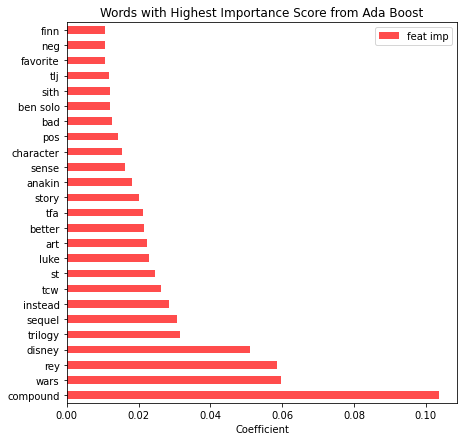

In [359]:
# Plot the importance scores for the most important features
imp.sort_values('feat imp', ascending = False).head(25).plot(kind= 'barh', color = 'red', alpha = 0.7, figsize = (7,7))
#plt.yticks(rotation = 70)
plt.xlabel('Coefficient')
plt.title('Words with Highest Importance Score from Ada Boost')
plt.savefig("./figs/importance_scores.png")

In [336]:
# Run the GradientBoost Classifier
gboost = GradientBoostingClassifier()
gboost_params = {
    'max_depth': [2,3,4],
    'n_estimators': [100, 125, 150],
    'learning_rate': [.08, .1, .12]
}
gb_gs = GridSearchCV(gboost, param_grid=gboost_params, cv=4)
gb_gs.fit(combined_X_train, y_train)
print(gb_gs.best_score_)
gb_gs.best_params_

0.7235810239279723


{'learning_rate': 0.12, 'max_depth': 3, 'n_estimators': 150}

In [340]:
print('Train score: ', gb_gs.score(combined_X_train, y_train))
print('Test score: ', gb_gs.score(combined_X_test, y_test))
preds = gb_gs.predict(combined_X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
# Calculate the specificity
print(f'Specificity = {tn / (tn + fp)}')
# Calculate the recall
print(f'Recall = {tp / (tp + fn)}')

Train score:  0.9176706827309237
Test score:  0.7835671342685371
Specificity = 0.8112449799196787
Recall = 0.756


### Model 9 - voting classifier using the best params from Extra Trees, AdaBoost, and Gradient Boost models

In [470]:
vote = VotingClassifier([
    ('tree', ExtraTreesClassifier()),
    ('ada', AdaBoostClassifier()),
    ('gb', GradientBoostingClassifier())
])
vote_params = {
    'tree__max_depth': [None],
    'tree__max_features': ['auto'],
    'tree__n_estimators': [125],
    #'ada__base_estimator__max_depth': [2],
    'ada__learning_rate': [0.1],
    'ada__n_estimators': [100],
    'gb__learning_rate': [.12],
    'gb__max_depth': [4],
    'gb__n_estimators': [125]
}
gs_vote = GridSearchCV(vote, param_grid=vote_params, cv=3)
gs_vote.fit(combined_X_train, y_train)
print(gs_vote.best_score_)
gs_vote.best_params_

0.7288609364081062


{'ada__learning_rate': 0.1,
 'ada__n_estimators': 100,
 'gb__learning_rate': 0.12,
 'gb__max_depth': 4,
 'gb__n_estimators': 125,
 'tree__max_depth': None,
 'tree__max_features': 'auto',
 'tree__n_estimators': 125}

In [416]:
# Get predictions
preds = gs_vote.predict(combined_X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()


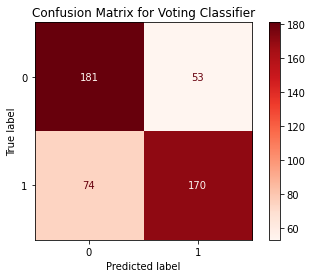

In [417]:
# View confusion matrix
plot_confusion_matrix(gs_vote, combined_X_test, y_test, cmap='Reds', values_format='d')
plt.title("Confusion Matrix for Voting Classifier")
plt.savefig("./figs/confusion_matrix.png");

In [418]:
# Calculate the specificity
tn / (tn + fp) # there are 5 real emails that got tagged as spam - that's bad! can we bring this to 0?

0.7735042735042735

In [354]:
print('Train score: ', gs_vote.score(combined_X_train, y_train))
print('Test score: ', gs_vote.score(combined_X_test, y_test))
preds = gs_vote.predict(combined_X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
# Calculate the specificity
print(f'Specificity = {tn / (tn + fp)}')
# Calculate the recall
print(f'Recall = {tp / (tp + fn)}')
print(f'Precision = {tp / (tp + fp)}')

Train score:  0.9323962516733602
Test score:  0.779559118236473
Specificity = 0.8072289156626506
Recall = 0.752
Precision = 0.7966101694915254


# Explore misclassified text

In [360]:
# Create a copy of the test set
pred_df = X_test.copy()


In [361]:
# Convert y_test to a numpy array
y_np = y_test.to_numpy()

In [362]:
# Add y_test as the target variable
pred_df['target'] = y_np

In [363]:
# Add in the predictions from our model
pred_df['predictions'] = preds

In [364]:
pred_df.head()

,features,feature_length,feature_word_count,compound,neg,neu,pos,target,predictions
0,regardless of whether it was necessary what gr...,121,14,0.0000,0.000,1.00,0.000,1,0
1,incrediblies 2 suffers from very similar seque...,2999,534,0.9923,0.084,0.77,0.147,1,1
2,perhaps we treated vector prime too harshly,44,7,0.0000,0.000,1.00,0.000,1,0
3,hmmmmmm,8,1,0.0000,0.000,1.00,0.000,0,0
4,complete canon timeline of the sequel era,42,7,0.0000,0.000,1.00,0.000,0,0


In [365]:
# Create a dataframe of the false positives
false_pos = pred_df[(pred_df['target'] == 0) & (pred_df['predictions'] == 1)]

In [377]:
false_pos.head(10)

,features,feature_length,feature_word_count,compound,neg,neu,pos,target,predictions
24,don’t know if this is allowed here so please t...,6477,1082,-0.9873,0.089,0.849,0.062,0,1
31,friendly reminder,18,2,0.4939,0.000,0.238,0.762,0,1
32,an autumn baby hbd mark hamill,35,6,0.0000,0.000,1.000,0.000,0,1
39,interesting that the uproar over whether or no...,237,40,0.2023,0.086,0.788,0.126,0,1
42,i dont want to see a star wars movie i want to...,1033,187,-0.8409,0.146,0.768,0.086,0,1
53,live fight another day boys live to fight anot...,57,10,-0.6369,0.394,0.606,0.000,0,1
68,at st goals,12,3,0.0000,0.000,1.000,0.000,0,1
84,about the sequel trilogy,26,4,0.0000,0.000,1.000,0.000,0,1
89,dude,5,1,0.0000,0.000,1.000,0.000,0,1
96,cantina patrons i humbly present to you the st...,10078,1841,-0.7289,0.070,0.855,0.075,0,1


In [373]:
# Create a dataframe with our false negatives
false_neg = pred_df[(pred_df['target'] == 1) & (pred_df['predictions'] == 0)]

In [375]:
false_neg.head(10)

,features,feature_length,feature_word_count,compound,neg,neu,pos,target,predictions
0,regardless of whether it was necessary what gr...,121,14,0.0000,0.000,1.000,0.000,1,0
2,perhaps we treated vector prime too harshly,44,7,0.0000,0.000,1.000,0.000,1,0
13,ahmed best sharing some black jedi love today ...,76,13,0.9538,0.000,0.316,0.684,1,0
23,somebody please explain why lasers in space no...,78,12,0.3182,0.000,0.827,0.173,1,0
50,do you believe that george lucas himself holds...,154,20,-0.8074,0.338,0.595,0.067,1,0
55,an illustrated tour of john boyegas journey to...,80,13,0.0000,0.000,1.000,0.000,1,0
57,serious question has any other star wars chara...,408,71,-0.4570,0.056,0.944,0.000,1,0
59,now this is the episode ix that everyone would...,58,11,0.5994,0.000,0.719,0.281,1,0
73,lets be honest the reason this community was m...,184,35,0.5466,0.078,0.761,0.162,1,0
74,watching a node video during their soap box de...,159,30,0.0000,0.000,1.000,0.000,1,0


In [472]:
# Save the false positives and false negatives to csv to explore
false_pos.to_csv('./data/false_pos.csv')

In [473]:
false_neg.to_csv('./data/false_neg.csv')